<a href="https://colab.research.google.com/github/afennell-tech/USGS_Wildfires/blob/dev/ExploratoryAnalysis_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note
The data for [1.88 Million US Wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires) is very large, so we store the file in google drive, rather than in our github repository. On Kaggle, the file provided is a SQLite database containing information on US wildfires. For the purpose of this project, we will utilize the sqlite3 library. Feel free to download the file to your local machine if you prefer. Click [here](https://drive.google.com/drive/folders/18YlVzuPCf-IXeQQSy0F3H32oG_KHEBhr?usp=sharing) to access the folder containing all data used for this project.

# Initial Setup:

Before running any of the below cells: 
1. Go to google drive (gdrive)
2. Find the 'USGS_Wildfires_Project_Content' folder, which should be in the 'Shared with me' section of your gdrive
3. Right click on the folder, and select 'Add shortcut to drive'
4. Click 'Add shortcut'
5. The folder should then appear in 'My Drive' section of gdrive

***Users only need to complete the above task once.*** 

# Getting Started: Workspace Setup

### Mounting Google Drive to Google Colab
Note: Any time the runtime is reset, you will need to reauthenticate to mount gdrive

In [1]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive' # default for the drive
PROJ = 'MyDrive/USGS_Wildfires_Project_Content' # path to project on Drive
PROJ_PATH = join(ROOT, PROJ)
DATA_PATH = join(PROJ_PATH, 'data')

drive.mount(ROOT) # we mount the drive at /content/drive

""" After executing the above code, the folder 'drive' will appear under 
the files section. This is the users respective gdrive """

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


" After executing the above code, the folder 'drive' will appear under \nthe files section. This is the users respective gdrive "

# Exploratory Analysis

### Helper Functions

In [2]:
import sqlite3 # to deal with database 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api

"""
Returns a Connection object that represents the input db.
"""
def get_sql_connection(sql_file): 
    return sqlite3.connect(sql_file)

"""
Returns a df for table from Connection object.
"""
def get_table(table_name, conn):
    query = "Select * from {}".format(table_name)
    return pd.read_sql_query(query, conn)

"""
Provided the input dataframe, function prints out the number of values each 
column takes on and if this number is less than input max_out, the corresponding 
values are printed as well.
"""
def print_col_info(df, max_out=5):
    # check if input is valid
    assert len(df.columns) > 0
    # iterate over each column
    for col_name, col in df.items(): 
        if len(col.value_counts()) <= max_out: 
            print(f"""Column name: {col_name}, NaN count: {col.isna().sum()}, 
            # of non-null values: {len(col.value_counts(dropna=False))}, 
            distinct values: {col.value_counts().index.tolist()}""")
        else: 
            print(f"""Column name: {col_name}, NaN count: {col.isna().sum()}, 
            # of non-null values: {len(col.value_counts(dropna=False))}""")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Variable Setup

In [3]:
USGS_DATA_PATH = join(DATA_PATH, 'FPA_FOD_20170508.sqlite')
usgs_db = get_sql_connection(USGS_DATA_PATH) # USGS data

### Exploration

In [4]:
'''
Note: If the below code breaks, make sure that the USGS_DATA_PATH 
is indeed the correct path to get to the .sqlite file. 
'''

# load fires data
fires_df = get_table('fires', usgs_db)
# drop OBJECTID and Shape; these are specific columns for the SQL db
fires_df.drop(columns=['OBJECTID', 'Shape'], inplace=True)

In [5]:
# First, we get some info about the dataframe itself

print(f"There are {len(fires_df)} rows and {len(fires_df.columns)} columns.")

print(f"List of all column names: {fires_df.columns}")

# get more info about the columns themselves (all)
print_col_info(fires_df, max_out=20)

There are 1880465 rows and 37 columns.
List of all column names: Index(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')
Column name: FOD_ID, NaN count: 0, 
            # of non-null values: 1880465
Column name: FPA_ID, NaN count: 0, 
            # of non-null values: 1880462
Column name: SOURCE_SYSTEM_TYPE, NaN count: 0, 
     

### For now, we only care about exploring the following variables: 
OWNER_DESCR, FIRE_SIZE, FIRE_SIZE_CLASS, FIRE_YEAR, DISCOVERY_DATE, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, COUNTY


Text(0.5, 1.0, 'Wildfires by cause')

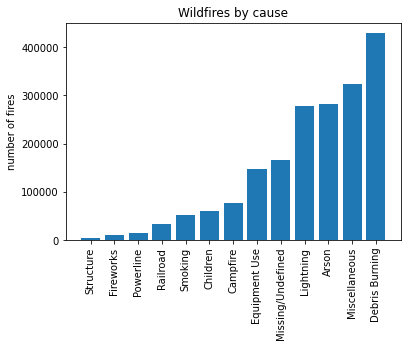

In [6]:
"""
Subset fires_df to explore the above columns. Find necessary and informative
descriptive statistics, clean the data, make simple visualizations, run simple
regressions, etc. Just do whatever feels right so we can begin to understand 
what steps to take moving forward. 
"""

# ADD CODE HERE - TODO
fires = fires_df[['OWNER_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY']]
by_cause = fires.groupby('STAT_CAUSE_DESCR').count().sort_values(by='OWNER_DESCR')
plt.bar(x=by_cause.index, height=by_cause['FIRE_SIZE'])
plt.xticks(rotation='vertical')
plt.ylabel('number of fires')
plt.title('Wildfires by cause')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

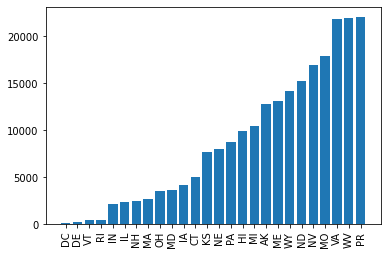

In [7]:
by_state = fires.groupby('STATE').count().sort_values(by='FIRE_SIZE')
first_50 = by_state[:26]
plt.bar(x=first_50.index, height=first_50['FIRE_SIZE'])
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

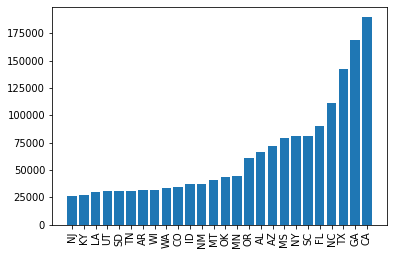

In [8]:
last_50 = by_state[26:]
plt.bar(x=last_50.index, height=last_50['FIRE_SIZE'])
plt.xticks(rotation='vertical')

['AL', 'AZ', 'MS', 'NY', 'SC', 'FL', 'NC', 'TX', 'GA', 'CA']

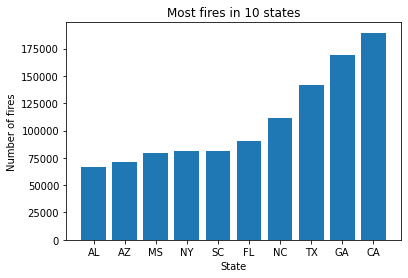

In [9]:
top_10_state = by_state[-10:]
lst_top_10 = list(top_10_state.index)
plt.bar(x=top_10_state.index, height=top_10_state['FIRE_SIZE'])
plt.title('Most fires in 10 states')
plt.ylabel('Number of fires')
plt.xlabel('State')
lst_top_10

Text(0, 0.5, 'Number of fires')

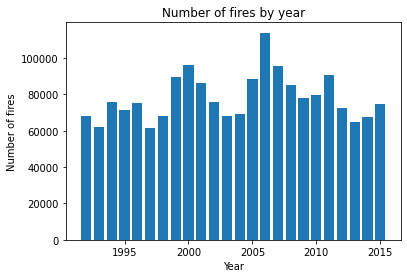

In [10]:
by_year = fires_df.groupby('FIRE_YEAR').count()
plt.bar(x=by_year.index, height=by_year['FIRE_SIZE'])
plt.title('Number of fires by year')
plt.xlabel('Year')
plt.ylabel('Number of fires')

In [13]:
fires_df['DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
fires_df['month'] = pd.DatetimeIndex(fires_df['DATE']).month
fires_df['month'] = fires_df.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
by_month = fires_df.groupby('month').count().sort_values('FIRE_SIZE')
by_month

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DATE,DATE
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dec,58819,58819,58819,58819,58819,58819,58819,58819,58819,5466,35672,3795,20387,360,360,92,92,40,58819,58819,58819,23271,58819,58819,22437,22437,20671,58819,58819,58819,58819,58819,58819,58819,40730,40730,40730,58819,58819
Nov,93637,93637,93637,93637,93637,93637,93637,93637,93637,12546,63068,8266,39412,939,939,426,426,91,93637,93637,93637,45983,93637,93637,44931,44931,41122,93637,93637,93637,93637,93637,93637,93637,63099,63099,63099,93637,93637
Jan,96438,96438,96438,96438,96438,96438,96438,96438,96438,8699,60258,6139,36971,688,688,157,157,18,96438,96438,96438,38324,96438,96438,37230,37230,34450,96438,96438,96438,96438,96438,96438,96438,69935,69935,69935,96438,96438
Oct,104992,104992,104992,104992,104992,104992,104992,104992,104992,21871,65038,14203,51015,840,840,357,357,66,104992,104992,104992,52936,104992,104992,52044,52044,46776,104992,104992,104992,104992,104992,104992,104992,65545,65545,65545,104992,104992
Sep,132065,132065,132065,132065,132065,132065,132065,132065,132065,39613,72623,29923,76092,1871,1871,738,738,456,132065,132065,132065,74281,132065,132065,73940,73940,67254,132065,132065,132065,132065,132065,132065,132065,76534,76534,76534,132065,132065
Feb,149142,149142,149142,149142,149142,149142,149142,149142,149142,11927,93268,6678,48710,1304,1304,334,334,91,149142,149142,149142,64756,149142,149142,61031,61031,56434,149142,149142,149142,149142,149142,149142,149142,102143,102143,102143,149142,149142
Jun,163440,163440,163440,163440,163440,163440,163440,163440,163440,47623,88255,41088,101481,3083,3083,1787,1787,668,163440,163440,163440,95076,163440,163440,94456,94456,88048,163440,163440,163440,163440,163440,163440,163440,94887,94887,94887,163440,163440
May,163898,163898,163898,163898,163898,163898,163898,163898,163898,34224,95511,24339,77898,1604,1604,710,710,213,163898,163898,163898,87426,163898,163898,88532,88532,80011,163898,163898,163898,163898,163898,163898,163898,106999,106999,106999,163898,163898
Aug,208578,208578,208578,208578,208578,208578,208578,208578,208578,83643,98853,70549,143203,5230,5230,2526,2526,2024,208578,208578,208578,135342,208578,208578,136667,136667,126611,208578,208578,208578,208578,208578,208578,208578,119819,119819,119819,208578,208578


Text(0, 0.5, 'Number of fire')

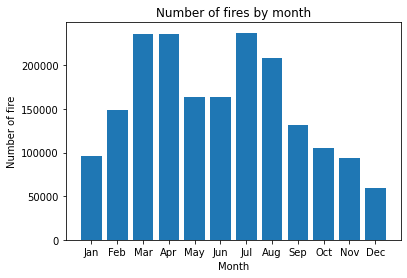

In [14]:
reorder_month = by_month.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.bar(x=reorder_month.index, height=reorder_month['FIRE_SIZE'])
plt.title('Number of fires by month')
plt.xlabel('Month')
plt.ylabel('Number of fire')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

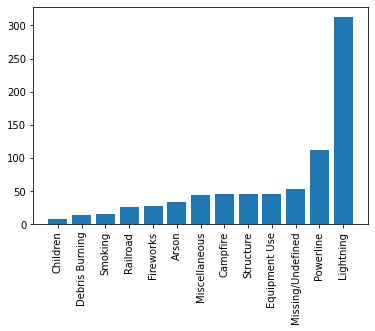

In [15]:
mean_size_by_cause = fires_df.groupby('STAT_CAUSE_DESCR').mean().sort_values(by='FIRE_SIZE')
plt.bar(x=mean_size_by_cause.index, height=mean_size_by_cause['FIRE_SIZE'])
plt.xticks(rotation='vertical')

In [16]:
#color by state